In [18]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
# Judul/Topik Project dan Identitas Lengkap
print("Judul: Prediksi Diabetes Menggunakan K-Nearest Neighbors (KNN)")
print("Nama: Deri Rosadi")
print("Nim : A11.2022.14191")
print("Kelompok : A11.4419")

Judul: Prediksi Diabetes Menggunakan K-Nearest Neighbors (KNN)
Nama: Deri Rosadi
Nim : A11.2022.14191
Kelompok : A11.4419


In [20]:
# Ringkasan dan Permasalahan Proyek
print("Ringkasan dan Permasalahan Proyek")
print("Proyek ini bertujuan untuk memprediksi apakah seorang pasien menderita diabetes berdasarkan berbagai fitur medis.")
print("Permasalahan yang ingin diselesaikan adalah menggunakan teknik machine learning, khususnya algoritma KNN, untuk mengklasifikasikan pasien dengan akurasi tinggi sebagai penderita atau tidak penderita diabetes.")

Ringkasan dan Permasalahan Proyek
Proyek ini bertujuan untuk memprediksi apakah seorang pasien menderita diabetes berdasarkan berbagai fitur medis.
Permasalahan yang ingin diselesaikan adalah menggunakan teknik machine learning, khususnya algoritma KNN, untuk mengklasifikasikan pasien dengan akurasi tinggi sebagai penderita atau tidak penderita diabetes.


In [21]:
# Tujuan 
print("Tujuan")
print("Tujuan dari proyek ini adalah mengembangkan model KNN yang dapat memprediksi diabetes dengan akurasi tinggi. Model akan dievaluasi menggunakan berbagai metrik seperti akurasi, matriks kebingungan, dan laporan klasifikasi.")

Tujuan
Tujuan dari proyek ini adalah mengembangkan model KNN yang dapat memprediksi diabetes dengan akurasi tinggi. Model akan dievaluasi menggunakan berbagai metrik seperti akurasi, matriks kebingungan, dan laporan klasifikasi.


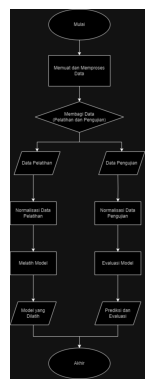

In [22]:
# Bagan Alur

# Membaca gambar
img = mpimg.imread('img/ML-A11202214191-UAS.png')

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')  # Menghilangkan axis
plt.show()


In [23]:
# Alur 
print("Alur")
print("1. Memuat dan memproses data")
print("2. Membagi data menjadi set pelatihan dan pengujian")
print("3. Menormalisasi data")
print("4. Melatih model KNN")
print("5. Mengevaluasi model")
print("6. Membuat prediksi pada data baru")

Alur
1. Memuat dan memproses data
2. Membagi data menjadi set pelatihan dan pengujian
3. Menormalisasi data
4. Melatih model KNN
5. Mengevaluasi model
6. Membuat prediksi pada data baru


Penjelasan Dataset, EDA, dan Proses Fitur Dataset

Analisis Data Eksploratif (EDA)
        Kehamilan     Glukosa  TekananDarah  KetebalanKulit     Insulin  \
count  768.000000  768.000000    768.000000      768.000000  768.000000   
mean     3.845052  120.894531     69.105469       20.536458   79.799479   
std      3.369578   31.972618     19.355807       15.952218  115.244002   
min      0.000000    0.000000      0.000000        0.000000    0.000000   
25%      1.000000   99.000000     62.000000        0.000000    0.000000   
50%      3.000000  117.000000     72.000000       23.000000   30.500000   
75%      6.000000  140.250000     80.000000       32.000000  127.250000   
max     17.000000  199.000000    122.000000       99.000000  846.000000   

              BMI  FungsiKeturunanDiabetes        Usia       Hasil  
count  768.000000               768.000000  768.000000  768.000000  
mean    31.992578                 0.471876   33.240885    0.348958  
std      7.884160                 

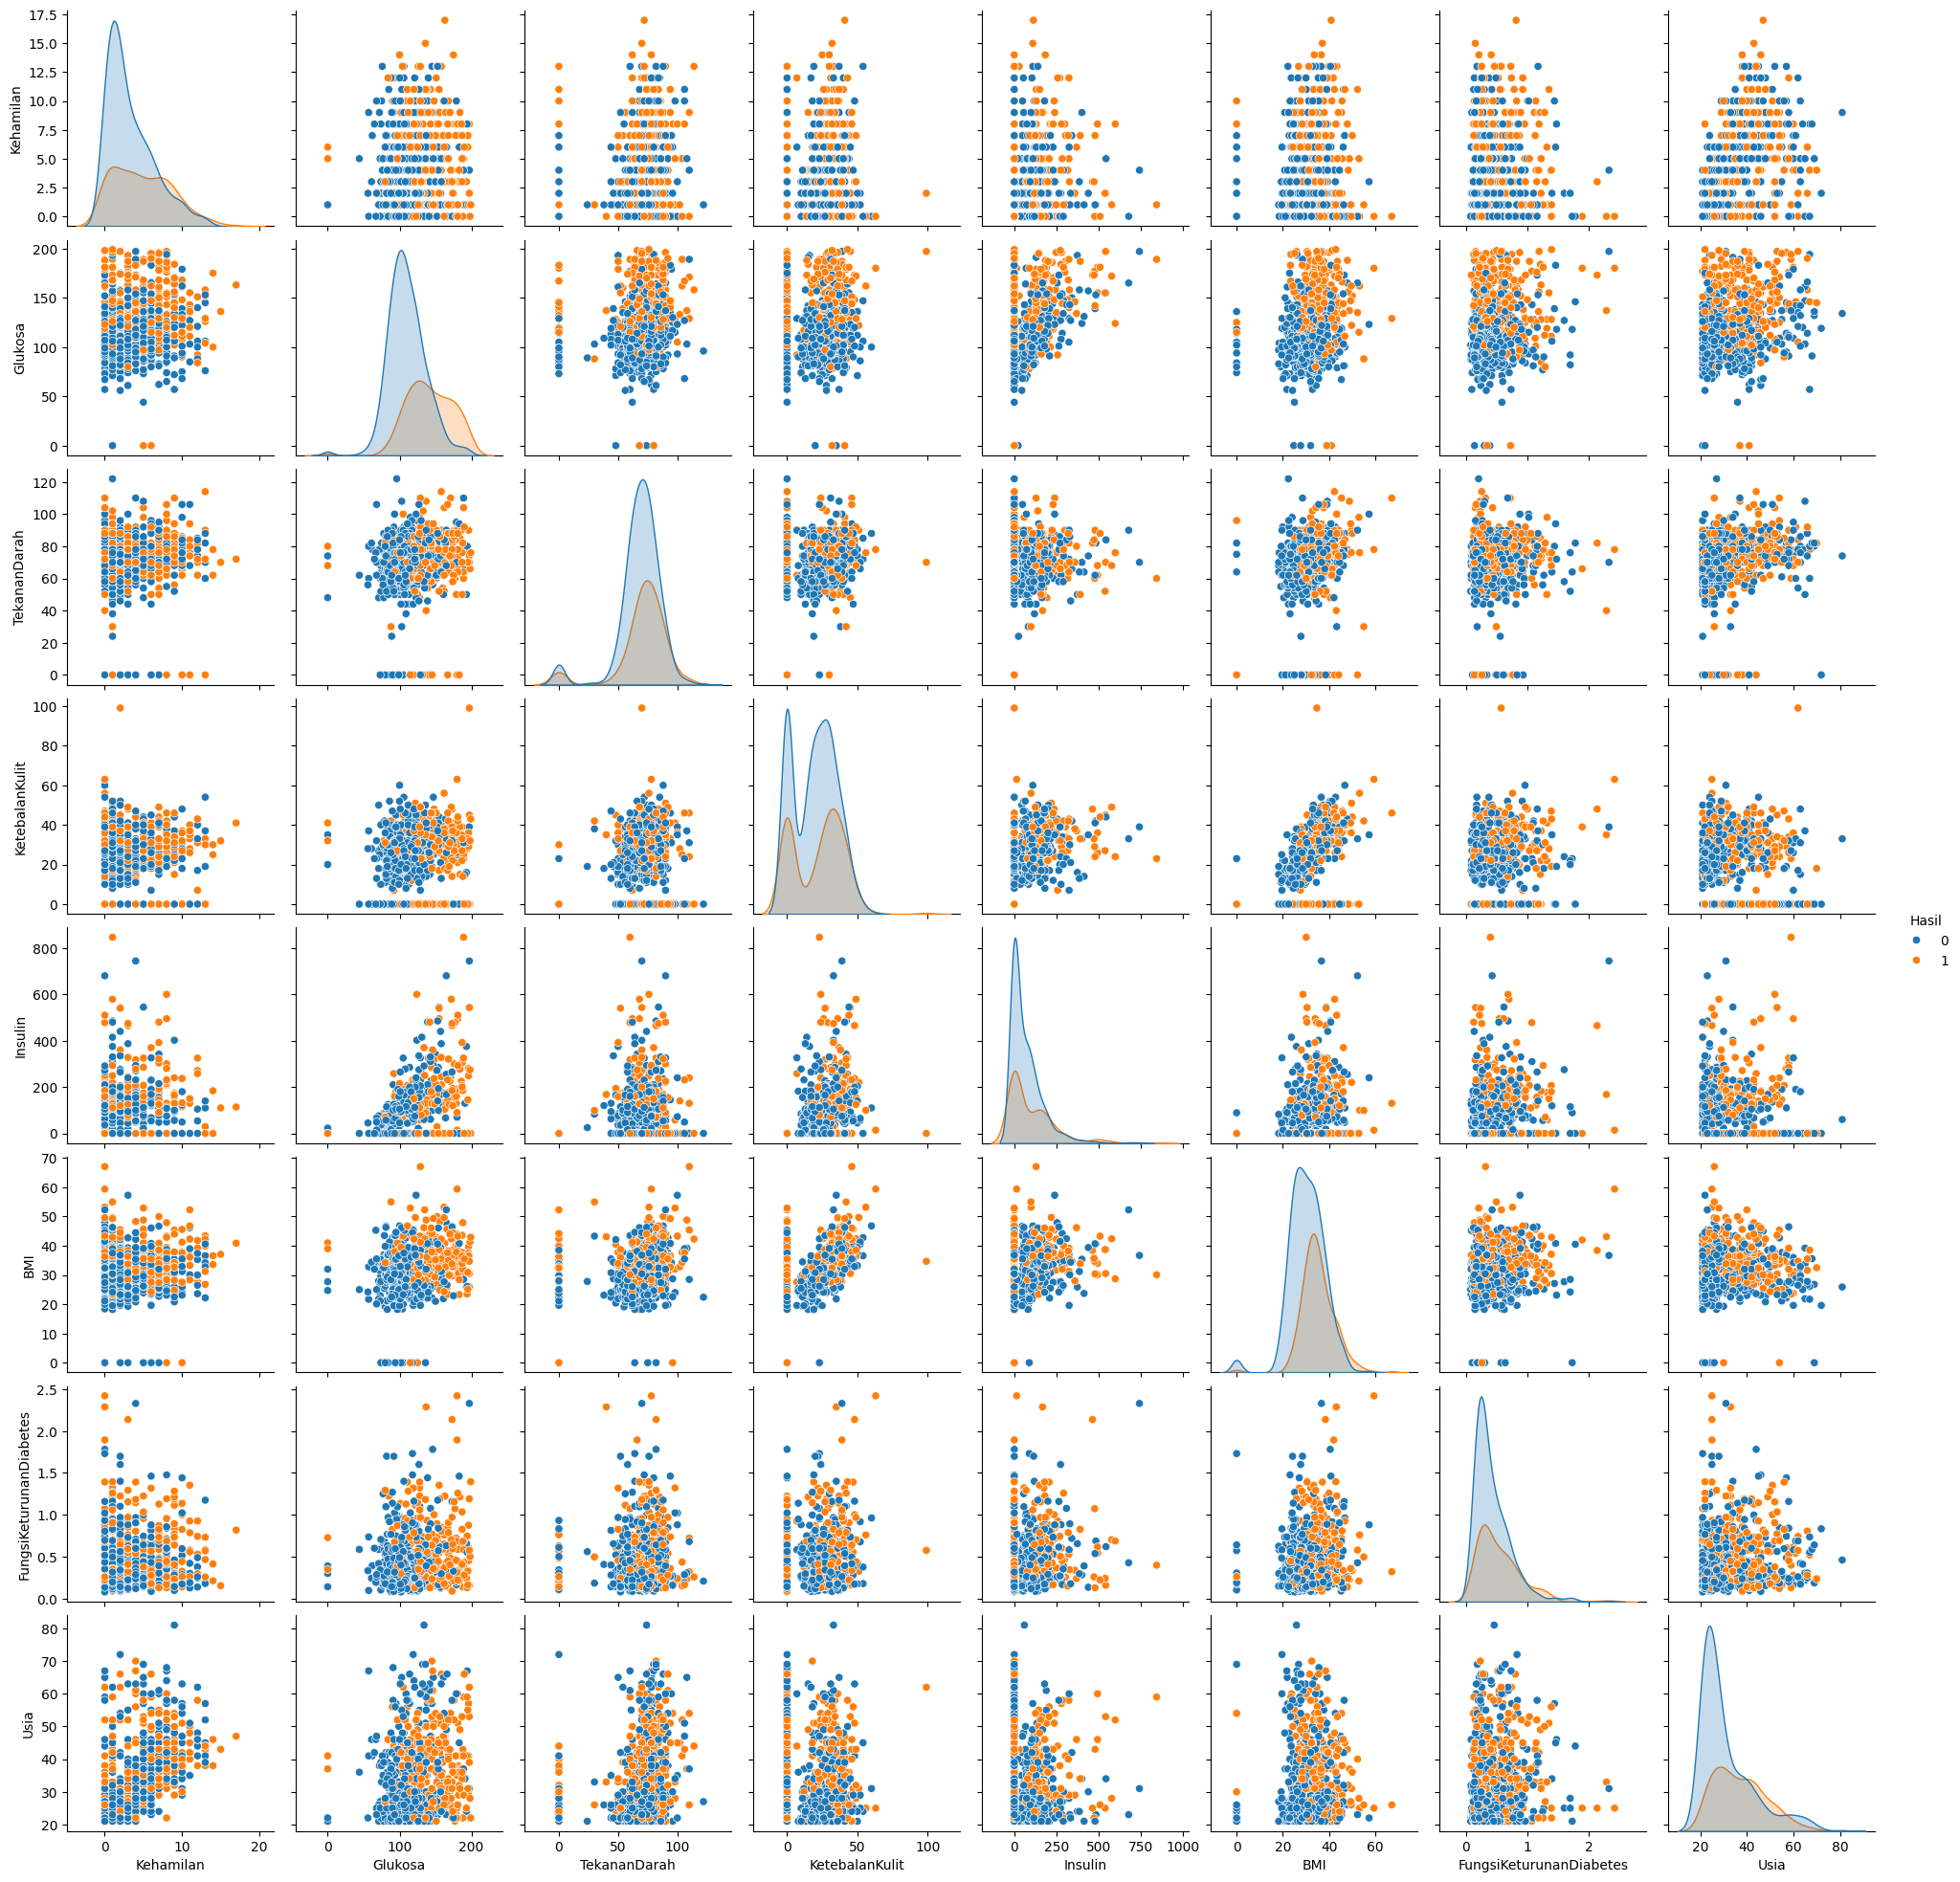

In [24]:
# Penjelasan Dataset, EDA, dan Proses Fitur Dataset
print("Penjelasan Dataset, EDA, dan Proses Fitur Dataset")

# Memuat dan memproses data
def muat_dan_proses_data(url):
    nama_kolom = ['Kehamilan', 'Glukosa', 'TekananDarah', 'KetebalanKulit', 'Insulin', 'BMI', 'FungsiKeturunanDiabetes', 'Usia', 'Hasil']
    df = pd.read_csv(url, header=None, names=nama_kolom)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    return df, X, y

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
df, X, y = muat_dan_proses_data(url)

# Analisis Data Eksploratif (EDA)
print("\nAnalisis Data Eksploratif (EDA)")
print(df.describe())
print(df.info())
sns.pairplot(df, hue="Hasil")
plt.show()

# Membagi dan menormalisasi data
def bagi_dan_normalisasi_data(X, y, ukuran_test=0.2, random_state=42):
    X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=ukuran_test, random_state=random_state)
    scaler = StandardScaler()
    X_latih = scaler.fit_transform(X_latih)
    X_uji = scaler.transform(X_uji)
    return X_latih, X_uji, y_latih, y_uji, scaler

X_latih, X_uji, y_latih, y_uji, scaler = bagi_dan_normalisasi_data(X, y)


In [26]:
# Proses Learning/Modelling
print("Proses Learning/Modelling")

# Melatih dan mengevaluasi model
def latih_dan_evaluasi_knn(X_latih, X_uji, y_latih, y_uji, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_latih, y_latih)
    y_pred = knn.predict(X_uji)
    akurasi = accuracy_score(y_uji, y_pred)
    matriks_kebingungan = confusion_matrix(y_uji, y_pred)
    laporan_klasifikasi = classification_report(y_uji, y_pred)
    return knn, akurasi, matriks_kebingungan, laporan_klasifikasi

# Input nilai k
k = int(input("Masukkan nilai k untuk KNN : "))

# Melatih dan mengevaluasi model
knn, akurasi, matriks_kebingungan, laporan_klasifikasi = latih_dan_evaluasi_knn(X_latih, X_uji, y_latih, y_uji, k)

Proses Learning/Modelling


Masukkan nilai k untuk KNN :  3


In [27]:
# Performa Model
print("Performa Model")
print(f"Akurasi: {akurasi}")
print("Matriks Kebingungan:")
print(matriks_kebingungan)
print("Laporan Klasifikasi:")
print(laporan_klasifikasi)

Performa Model
Akurasi: 0.7077922077922078
Matriks Kebingungan:
[[81 18]
 [27 28]]
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        99
           1       0.61      0.51      0.55        55

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



In [28]:
# Hasil dan Kesimpulan
print("Hasil dan Kesimpulan")

# Input untuk prediksi
def ambil_input_pengguna():
    kehamilan = int(input("Masukkan jumlah kehamilan                                       : "))
    glukosa = float(input("Masukkan konsentrasi glukosa plasma                             : "))
    tekanan_darah = float(input("Masukkan tekanan darah diastolik (mm Hg)                        : "))
    ketebalan_kulit = float(input("Masukkan ketebalan lipatan kulit triceps (mm)                   : "))
    insulin = float(input("Masukkan kadar insulin serum 2 jam (mu U/ml)                    : "))
    bmi = float(input("Masukkan indeks massa tubuh (berat dalam kg/(tinggi dalam m)^2) : "))
    fungsi_keturunan = float(input("Masukkan fungsi garis keturunan diabetes                        : "))
    usia = int(input("Masukkan usia                                                   : "))
    
    return np.array([kehamilan, glukosa, tekanan_darah, ketebalan_kulit, insulin, bmi, fungsi_keturunan, usia]).reshape(1, -1)

input_pengguna = ambil_input_pengguna()
input_pengguna_tereskalasi = scaler.transform(input_pengguna)
prediksi = knn.predict(input_pengguna_tereskalasi)

print(f"Model memprediksi bahwa pasien {'menderita' if prediksi[0] == 1 else 'tidak menderita'} diabetes.")


Hasil dan Kesimpulan


Masukkan jumlah kehamilan                                       :  6
Masukkan konsentrasi glukosa plasma                             :  148
Masukkan tekanan darah diastolik (mm Hg)                        :  72
Masukkan ketebalan lipatan kulit triceps (mm)                   :  35
Masukkan kadar insulin serum 2 jam (mu U/ml)                    :  0
Masukkan indeks massa tubuh (berat dalam kg/(tinggi dalam m)^2) :  33.6
Masukkan fungsi garis keturunan diabetes                        :  0.627
Masukkan usia                                                   :  50


Model memprediksi bahwa pasien menderita diabetes.


In [29]:
print("Kesimpulan:")
print("Model KNN berhasil dilatih dan dievaluasi. Model ini mencapai akurasi", akurasi, "pada data uji.")
print("Model ini dapat digunakan untuk memprediksi apakah seorang pasien menderita diabetes berdasarkan fitur medis mereka.")

Kesimpulan:
Model KNN berhasil dilatih dan dievaluasi. Model ini mencapai akurasi 0.7077922077922078 pada data uji.
Model ini dapat digunakan untuk memprediksi apakah seorang pasien menderita diabetes berdasarkan fitur medis mereka.
